In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import pickle
import copy

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.control.optimal_control import oc_wc, cost_functions

import matplotlib as mpl

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

while "Promotion/neurolib" in os.getcwd():
    os.chdir('..')

In [2]:
coords = [2., 1.]

N = 1
model = WCModel()
dt = model.params['dt']

In [3]:
model = WCModel()
model.run()

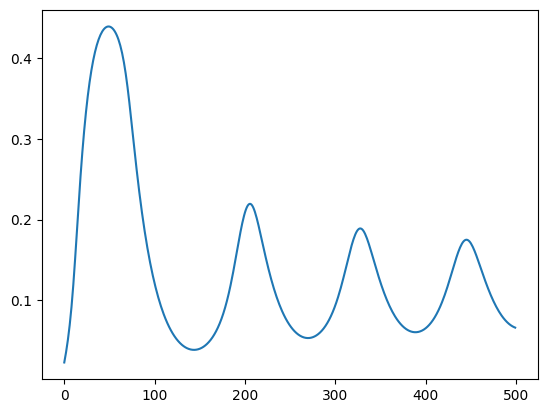

In [4]:
model = WCModel()
testd = 50
model.params.duration = testd
model.params.dt = dt

model.params.exc_ext_baseline = coords[0]
model.params.inh_ext_baseline = coords[1]

model.run()

plt.plot(model.exc[0,:])
plt.show()

einit = np.zeros((N, 1))
iinit = np.zeros((N, 1))
for n in range(N):
    einit[n,:] = model.exc[n,-1]
    iinit[n,:] = model.inh[n,-1]

Optimal control with target oscillation period
MAX adj =  0.00707740264388774


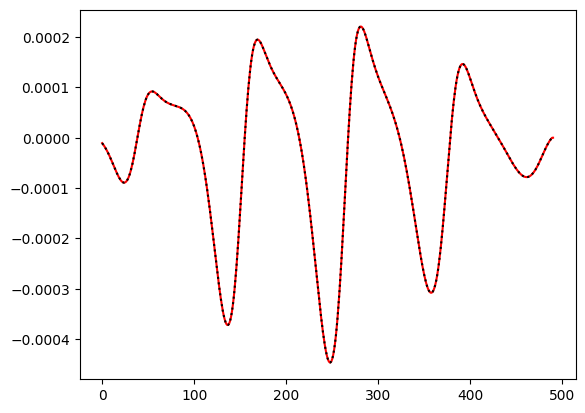

In [6]:
target_period = 10
pr = np.arange(0,30,5)
int0, int1 = 0, -1
costmat = np.zeros((1,2))
costmat[0,0] = 1

model.params.exc_init = einit
model.params.inh_init = iinit

model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0, int1), control_interval=(int0, int1), cost_matrix=costmat, control_matrix=costmat)
model_controlled.weights["w_p"] = 0.
model_controlled.weights["w_2"] = 0.
model_controlled.weights["w_f"] = 1.

grad_an = model_controlled.compute_gradient()
grad_num = model_controlled.compute_gradient_num()

plt.plot(grad_an[0,0,10:], color="red")
plt.plot(grad_num[0,0,10:], color="black", linestyle=":")
plt.show()